In [1]:
!pip install scikit-image watermark -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt

[OpenCV](https://opencv.org/) ("Open Computer Vision") es una librería de código abierto de visión artificial desarrollada originalmente por Intel. Implementada en `C++` pero con APIs en multiples lenguajes, con soporte multiplataforma, es una de las librerías más populares y utilizadas de computer vision. Incluye una gran cantidad de funcionalidad relacionada a la visión artificial.

[watermark](https://github.com/rasbt/watermark) es una extensión de las "magic functions" de jupyter que permite verificar fácilmente la versión de python y de las librerías instaladas.

In [3]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2025-03-26T21:17:02.482608+00:00

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

matplotlib: 3.10.0
numpy     : 2.0.2
cv2       : 4.11.0



##Input Image

In [4]:
!wget https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg

#https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.coins
#https://opencollection.brooklynmuseum.org/archives/image/51611

--2025-03-26 21:17:06--  https://d1lfxha3ugu3d4.cloudfront.net/images/opencollection/archives/size2/S03i3165l01.jpg
Resolving d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)... 3.163.157.92, 3.163.157.119, 3.163.157.19, ...
Connecting to d1lfxha3ugu3d4.cloudfront.net (d1lfxha3ugu3d4.cloudfront.net)|3.163.157.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30340 (30K) [image/jpeg]
Saving to: ‘S03i3165l01.jpg’

S03i3165l01.jpg     100%[===================>]  29.63K  --.-KB/s    in 0.005s  

2025-03-26 21:17:06 (5.63 MB/s) - ‘S03i3165l01.jpg’ saved [30340/30340]



## Leer y mostrar la imagen

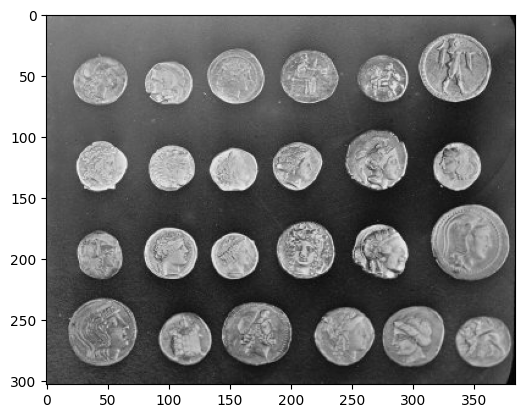

In [27]:
img = imread('S03i3165l01.jpg')
plt.imshow(img)
plt.show()

In [28]:
type(img)

numpy.ndarray

## Funcion ¿cómo es esta imagen?

In [29]:
def data_img(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

data_img(img)

size =  (303, 384, 3)
max  =  252
min  =  1


¿Qué son estas dimensiones?

La función data_img nos muestra la forma de la imagen a través de img.shape. Esta tupla nos indica las dimensiones de la imagen. Las dos primeras dimensiones corresponden al alto (height) y al ancho (width) de la imagen, respectivamente. Por ejemplo, si img.shape devuelve (305, 200, 3), significa que la imagen tiene 305 pixeles de alto, 200 pixeles de ancho y 3 canales de color (RGB).

## Recortar / cropear

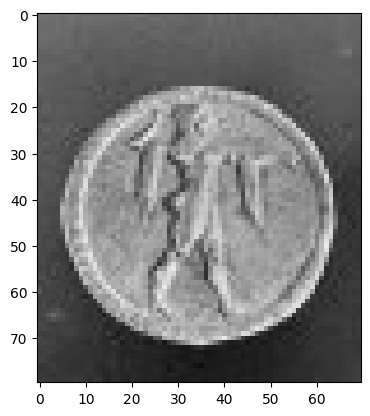

In [30]:
# Primero alto, despues ancho
img_cropped = img[0:80, 300:370]
plt.imshow(img_cropped)

In [31]:
data_img(img_cropped)

size =  (80, 70, 3)
max  =  234
min  =  14


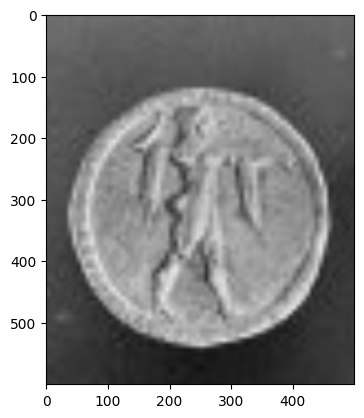

In [32]:
# Primero ancho y despues alto
img_resize = cv2.resize(img_cropped, (500, 600))
plt.imshow(img_resize)

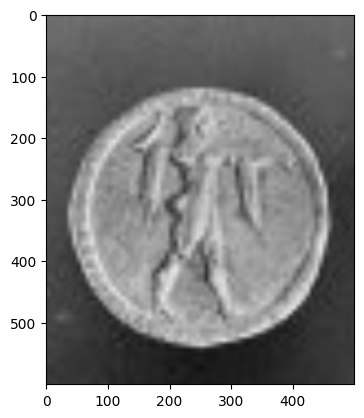

In [33]:
# Primero ancho y despues alto
img_resize = cv2.resize(img_cropped, (500, 600))
plt.imshow(img_resize)

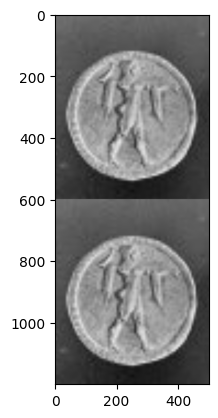

In [34]:
# Apilado vertical
ver = np.vstack((img_resize, img_resize))
plt.imshow(ver);

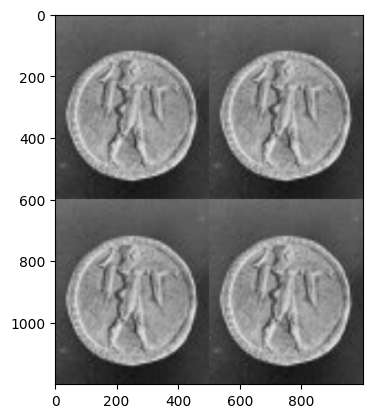

In [35]:
# Apilamos horizontamente dos filas, generando una "matriz" de 2x2
hor2 = np.hstack((ver, ver))
plt.imshow(hor2);

## Selección del primer canal

In [36]:
X = img_cropped[:,:,0]
data_img(X)

size =  (80, 70)
max  =  234
min  =  14


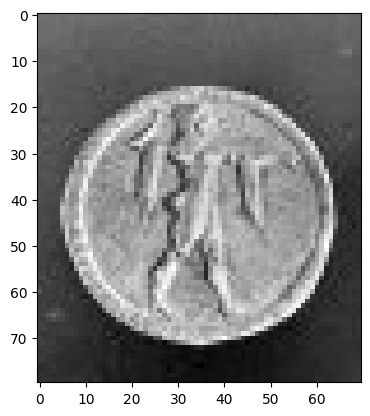

In [37]:
plt.imshow(X,cmap='gray')
plt.show()

Para usar esta función llamamos a [`cv2.Canny()`](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html). El primer parámetro es la imagen en la que queremos detectar los bordes. El segundo y el tercer parámetro configuran la sensibilidad del algoritmo. Valores típicos son: `(100, 200)`, `(50, 100)`, `(150, 200)`. El tercero debe ser más alto que el primero (uno es un mínimo y otro es un máximo). Valores bajos harán al algoritmo más sensible (esto es, detectará más bordes) y valores más altos harán que detecte menos bordes.

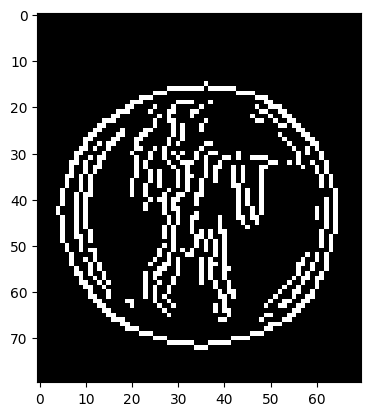

In [42]:
img_canny = cv2.Canny(img_cropped, 200, 250)
plt.imshow(img_canny, cmap='gray');

En OpenCV y NumPy, las imágenes a color se almacenan como arrays de 3 dimensiones:

* Primera dimensión (altura): número de filas
* Segunda dimensión (ancho): número de columnas
* Tercera dimensión (canales): 3 valores para BGR (Blue, Green, Red)

La notación [:,:,0] utiliza el indexado de NumPy donde:

* : significa "tomar todos los elementos" de esa dimensión
* 0 significa "tomar solo el primer canal"

Por ejemplo, si tenemos una imagen de 100x200 píxeles:

* img_cropped[: , : , 0] - Canal Rojo (primer canal)
* img_cropped[: , : , 1] - Canal Verde (segundo canal)
* img_cropped[: , : , 2] - Canal Azul (tercer canal)

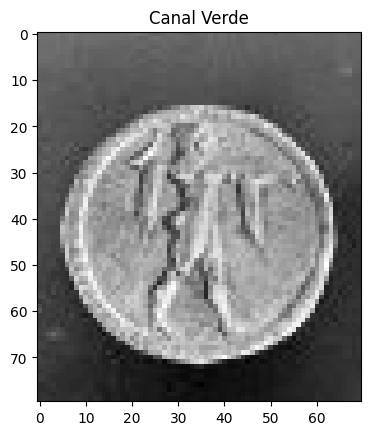

In [16]:
# Canal Rojo
X_red = img_cropped[:,:,1]
plt.imshow(X_red, cmap='gray')
plt.title('Canal Verde')
plt.show()

In [17]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/124084.jpg

--2025-03-26 21:17:52--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/124084.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25226 (25K) [image/jpeg]
Saving to: ‘124084.jpg’

124084.jpg          100%[===================>]  24.63K  --.-KB/s    in 0.02s   

2025-03-26 21:17:52 (1.26 MB/s) - ‘124084.jpg’ saved [25226/25226]



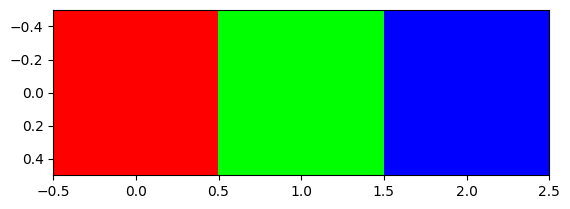

In [26]:
# Todo rojo, nada de verde, nada de azul ==> rojo
pixel1 = (255, 0, 0)

# Todo rojo, todo verde, nada de azul ==> amarillo
pixel2 = (0, 255, 0)

# Todo rojo, nada verde, todo azul ==> purpura
pixel3 = (0, 0, 255)

plt.imshow([[pixel1, pixel2, pixel3]]);

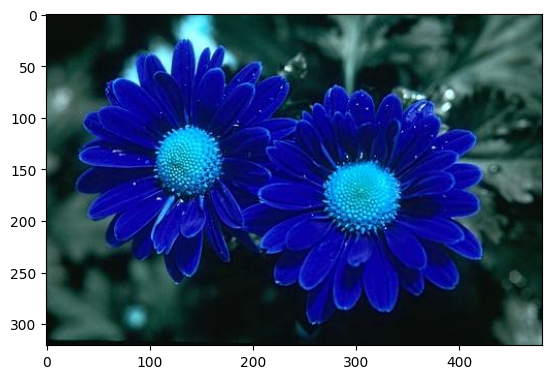

In [18]:
img = imread('124084.jpg')
plt.imshow(img)
plt.show()

In [24]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [19]:
img[0, 0]

array([10, 14,  9], dtype=uint8)

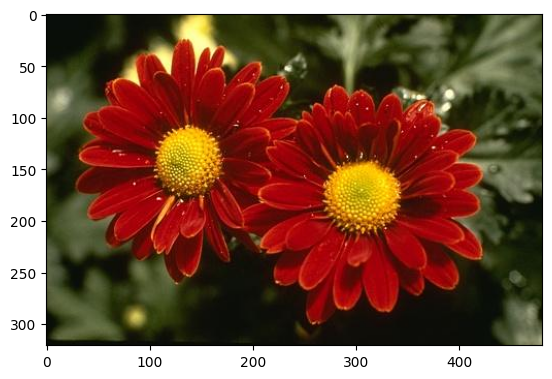

In [25]:
plt.imshow(img_rgb);

## Thresholding - Segmentación simple

In [ ]:
def segmenta(X,t):
    # X: imagen de entrada (matriz 2D)
    # t: valor de umbral (threshold)

    (N,M) = X.shape  # Obtiene dimensiones de la imagen
    Y = np.zeros((N,M))  # Crea matriz de ceros del mismo tamaño
    area = 0  # Inicializa contador de píxeles

    # Recorre cada píxel de la imagen
    for i in range(N):  # Recorre filas
        for j in range(M):  # Recorre columnas
            if X[i,j] > t:  # Si el píxel supera el umbral
                Y[i,j] = 255  # Lo marca como blanco
                area = area + 1  # Incrementa el contador

    print('area = ',area)  # Imprime área total
    return Y  # Devuelve imagen segmentada

## Segmentación

area =  2356
size =  (80, 70)
max  =  255.0
min  =  0.0


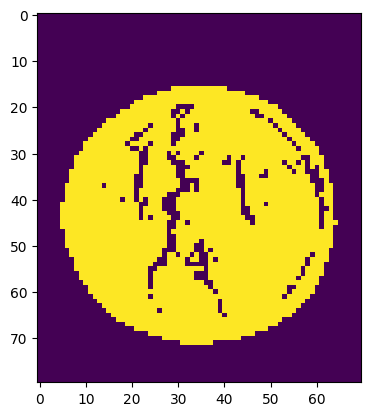

In [ ]:
# 1. Llamada a la función de segmentación
Y = segmenta(X,120)  # Segmenta la imagen usando umbral 120

# 2. Analiza las propiedades de la imagen resultante
data_img(Y)

# 3. Visualiza la imagen segmentada
plt.imshow(Y)
plt.show()

# Todas las monedas

size =  (303, 384)
max  =  252
min  =  1


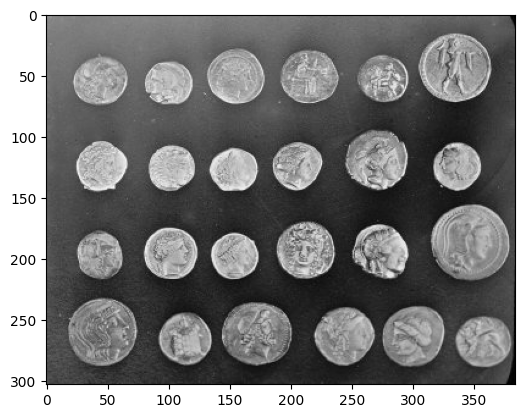

In [ ]:
full_img = imread('S03i3165l01.jpg')
X   = full_img[:,:,0]
data_img(X)
plt.imshow(X,cmap='gray')
plt.show()

area =  48864


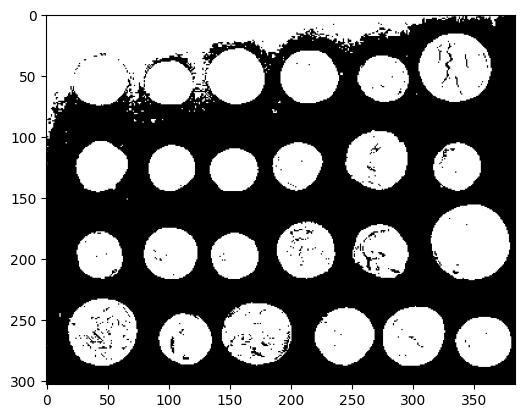

In [ ]:
Y = segmenta(X,100)
plt.imshow(Y,cmap='gray')
plt.show()

area =  23765


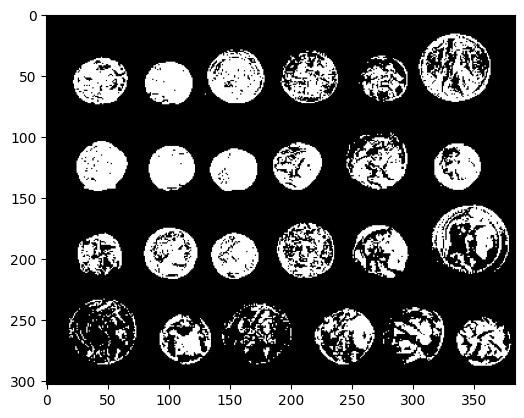

In [ ]:
Y = segmenta(X,150)
plt.imshow(Y,cmap='gray')
plt.show()

## Definición de un fondo homogéneo

El propósito de este código es:

* Normalizar la iluminación por filas
* Reducir variaciones de fondo
* Mejorar el contraste local
* Facilitar la segmentación posterior

Por ejemplo:

Si una fila tiene valores [100, 120, 150] y el mínimo es 100 después de la normalización: [0, 20, 50]

Esto es útil cuando:

* Hay variaciones de iluminación en la imagen
* El fondo no es uniforme
* Se necesita resaltar objetos sobre el fondo
* Se quiere preparar la imagen para segmentación

La imagen resultante tendrá:

* Fondo más uniforme
* Objetos más destacados
* Mejor contraste local
* Más facilidad para aplicar umbralización

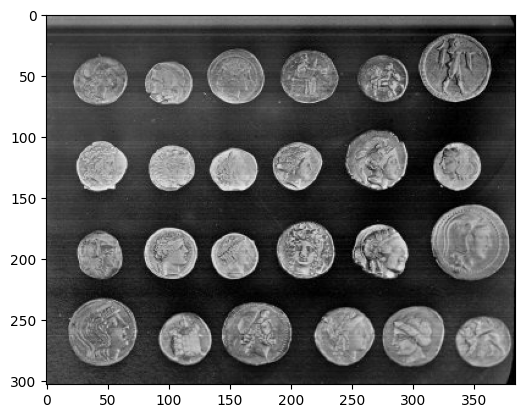

In [ ]:
# 1. Obtiene las dimensiones de la imagen
(N,M) = X.shape  # N = número de filas, M = número de columnas

# 2. Crea una matriz vacía del mismo tamaño
Xm = np.zeros((N,M), np.uint8)  # Matriz de ceros de 8 bits

# 3. Procesa cada fila de la imagen
for i in range(N):
    xmin = np.min(X[i,:])  # Encuentra el valor mínimo de la fila
    Xm[i,:] = X[i,:] - xmin  # Resta el mínimo a toda la fila

# 4. Visualiza el resultado
plt.imshow(Xm, cmap='gray')
plt.show()

area =  17466


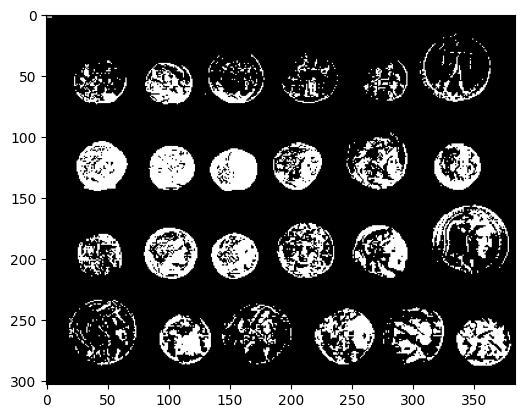

In [ ]:
Y = segmenta(Xm,140)
plt.imshow(Y,cmap='gray')
plt.show()